In [1]:
# Unzip and extract files into .csv

In [2]:
import zipfile

with zipfile.ZipFile("database.csv.zip", "r") as zip_ref:
    zip_ref.extractall("earthquake_data")

In [3]:
import pandas as pd

df = pd.read_csv("earthquake_data/database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [22]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()
df.isnull().sum()

# Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
df = pd.read_csv("earthquake_data/database.csv")

# Keep only real earthquakes
df = df[df["Type"] == "Earthquake"]

# Parse datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0


In [7]:
# 1. Magnitude vs Frequency (Gutenberg-Richter Law)

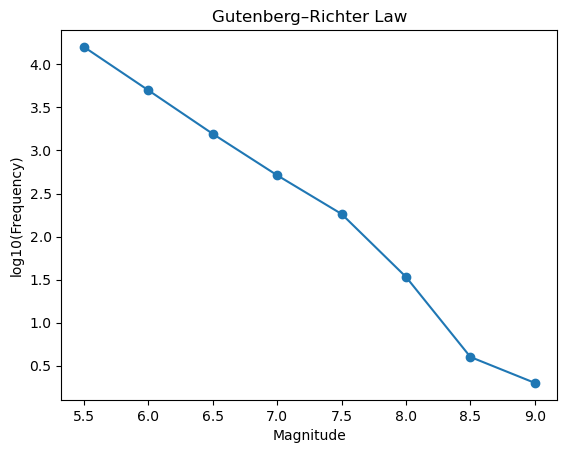

In [8]:
magnitudes = df["Magnitude"]

bins = np.arange(0, magnitudes.max() + 0.5, 0.5)
counts, edges = np.histogram(magnitudes, bins=bins)

nonzero = counts > 0
log_counts = np.log10(counts[nonzero])
bin_centers = edges[:-1][nonzero]

plt.figure()
plt.plot(bin_centers, log_counts, marker="o")
plt.xlabel("Magnitude")
plt.ylabel("log10(Frequency)")
plt.title("Gutenberg–Richter Law")
plt.show()

In [9]:
# 2. Depth vs Magnitude Relationship

Depth–Magnitude Correlation: 0.023


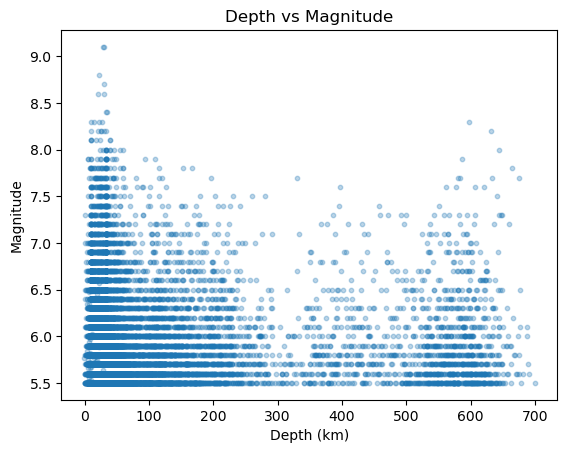

In [10]:
depth = df["Depth"]
mag = df["Magnitude"]

corr = np.corrcoef(depth, mag)[0, 1]
print(f"Depth–Magnitude Correlation: {corr:.3f}")

plt.figure()
plt.scatter(depth, mag, alpha=0.3, s=10)
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Depth vs Magnitude")
plt.show()


In [11]:
# 3. Distribution of Earthquake Magnitudes

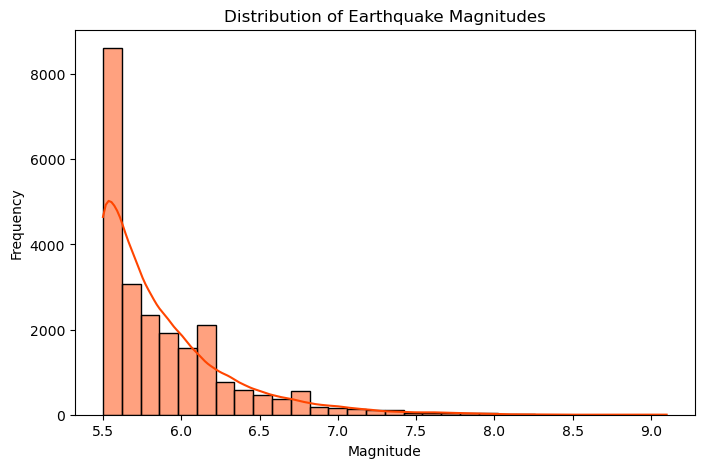

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='orangered')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [13]:
# 4. Number of Earthquakes per Year

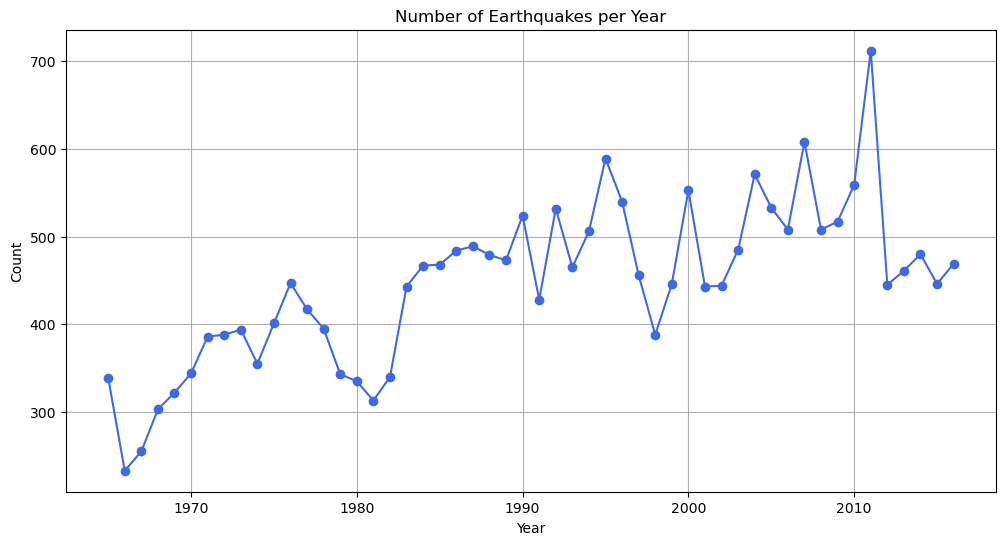

In [14]:
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='royalblue')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [15]:
# 5. Earthquake Density Map

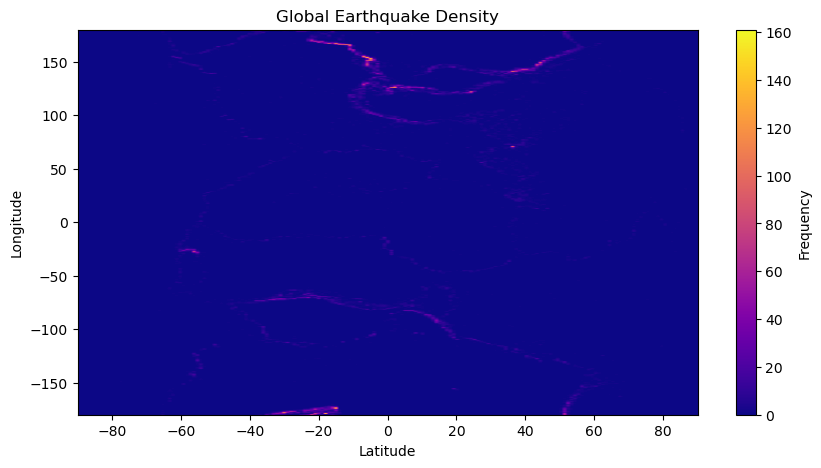

In [29]:
lat_bins = np.linspace(-90, 90, 180)
lon_bins = np.linspace(-180, 180, 360)

heatmap, _, _ = np.histogram2d(
    df["Latitude"], df["Longitude"],
    bins=[lat_bins, lon_bins]
)

plt.figure(figsize=(10, 5))
plt.imshow(
    heatmap.T,
    origin="lower",
    aspect="auto",
    extent=[-90, 90, -180, 180],
    cmap="plasma"
)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Global Earthquake Density")
plt.colorbar(label="Frequency")
plt.show()


In [ ]:
# 6. Energy release estimation

In [ ]:
df["Energy_J"] = 10 ** (1.5 * df["Magnitude"] + 4.8)

energy_year = df.groupby("Year")["Energy_J"].sum()

plt.figure()
plt.plot(energy_year.index, energy_year.values)
plt.xlabel("Year")
plt.ylabel("Total Energy Released (J)")
plt.title("Seismic Energy Release per Year")
plt.show()

In [ ]:
# 7. Temporal Clustering & Aftershock Behavior

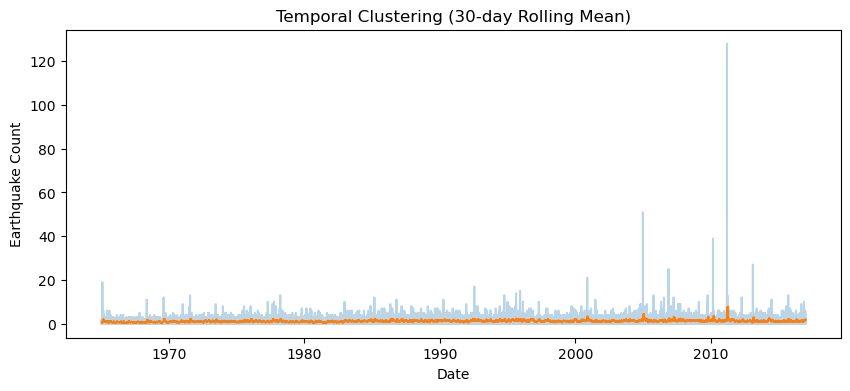

In [21]:
daily_counts = df.set_index("Date").resample("D").size()
rolling = daily_counts.rolling(window=30).mean()

plt.figure(figsize=(10, 4))
plt.plot(daily_counts.index, daily_counts.values, alpha=0.3)
plt.plot(rolling.index, rolling.values)
plt.xlabel("Date")
plt.ylabel("Earthquake Count")
plt.title("Temporal Clustering (30-day Rolling Mean)")
plt.show()


In [ ]:
# 8. Azimuthal Gap Analysis (Network Geometry Quality)

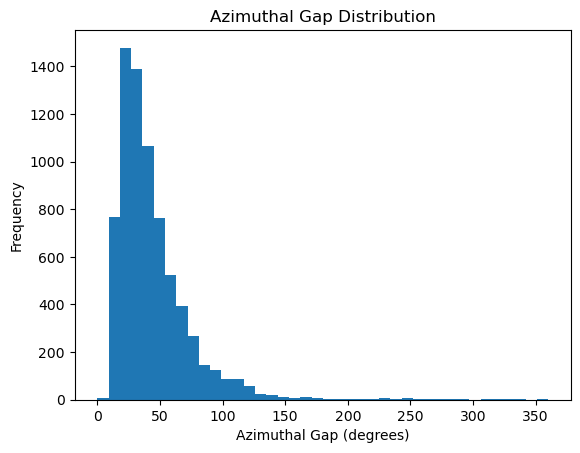

In [19]:
gap = df["Azimuthal Gap"]

plt.figure()
plt.hist(gap, bins=40)
plt.xlabel("Azimuthal Gap (degrees)")
plt.ylabel("Frequency")
plt.title("Azimuthal Gap Distribution")
plt.show()


In [ ]:
# 9. Azimuthal Gap vs Magnitude

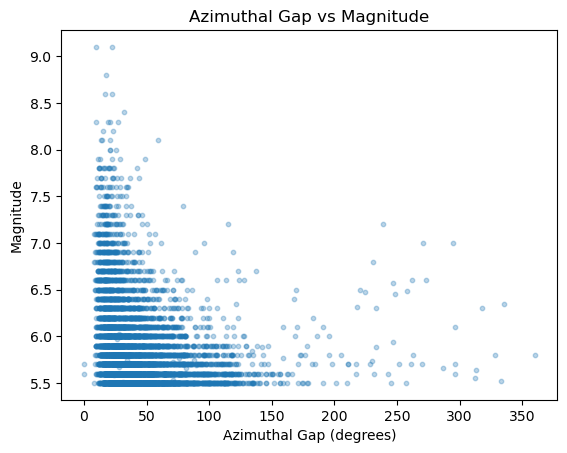

In [20]:
plt.figure()
plt.scatter(gap, df["Magnitude"], alpha=0.3, s=10)
plt.xlabel("Azimuthal Gap (degrees)")
plt.ylabel("Magnitude")
plt.title("Azimuthal Gap vs Magnitude")
plt.show()


In [ ]:
# 10. Generating Earthquake Map

In [17]:
quake_map = folium.Map(location=[0, 0], zoom_start=2)
for _, row in df.sample(500).iterrows():  # Limit points for performance
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=f"Magnitude: {row['Magnitude']}, Depth: {row['Depth']}",
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(quake_map)

quake_map

NameError: name 'folium' is not defined

In [ ]:
!conda install -c conda-forge folium --yes


In [ ]:
!pip install folium


In [30]:
import folium

In [31]:
quake_map = folium.Map(location=[0, 0], zoom_start=2)
for _, row in df.sample(500).iterrows():  # Limit points for performance
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=f"Magnitude: {row['Magnitude']}, Depth: {row['Depth']}",
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(quake_map)

quake_map